In [151]:
import pandas as pd

# Load dataset
df = pd.read_csv('data.csv')

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=32)

In [153]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# fix random seed for reproducibility
tf.random.set_seed(32)

In [154]:
LSTM_model = keras.Sequential()
LSTM_model.add(layers.Embedding(input_dim=5000, output_dim=32))
LSTM_model.add(layers.LSTM(200))
LSTM_model.add(layers.Dense(1, activation='linear'))
LSTM_model.compile(optimizer='adam', loss='mse')

In [155]:
LSTM_model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
160/160 [==============================] - 10s 18ms/step - loss: 8773.2207
Epoch 2/25
160/160 [==============================] - 3s 19ms/step - loss: 4884.5400
Epoch 3/25
160/160 [==============================] - 3s 17ms/step - loss: 3118.2017
Epoch 4/25
160/160 [==============================] - 3s 16ms/step - loss: 2285.8096
Epoch 5/25
160/160 [==============================] - 3s 17ms/step - loss: 1919.9965
Epoch 6/25
160/160 [==============================] - 3s 17ms/step - loss: 1778.7688
Epoch 7/25
160/160 [==============================] - 3s 16ms/step - loss: 1724.2770
Epoch 8/25
160/160 [==============================] - 3s 17ms/step - loss: 1711.2213
Epoch 9/25
160/160 [==============================] - 3s 17ms/step - loss: 1701.7867
Epoch 10/25
160/160 [==============================] - 3s 19ms/step - loss: 1702.2073
Epoch 11/25
160/160 [==============================] - 3s 16ms/step - loss: 1698.9314
Epoch 12/25
160/160 [==============================] - 3s 17ms

In [156]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
# Predict the values of the validation set
y_pred = LSTM_model.predict(X_test)

2/2 [==============================] - 1s 16ms/step


In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 11.375846383754638
Mean Squared Error: 221.4815250778344
Root Mean Squared Error: 14.882255376045473
R-squared: 0.8796968135493503


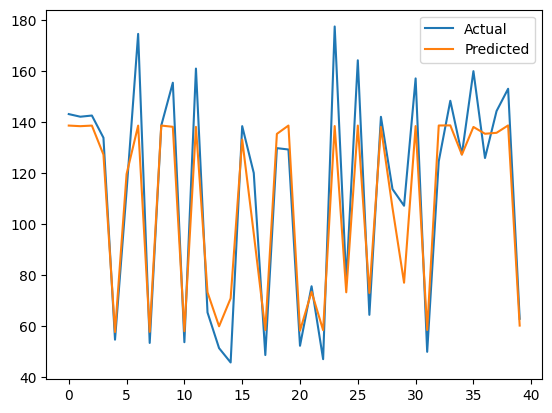

In [158]:
import matplotlib.pyplot as plt
y_test = y_test.reset_index(drop=True)

# plot the actual and predicted values on the same plot
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()